In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
beers = pd.read_csv("Beers.csv")
beers.head(3)

,Unnamed: 0,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,0,4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
1,1,59,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),3.5,3.5,4.0,4.0,NJpadreFan,4.0,Caldera- Pale Ale Picked up at Grape & Gourmet...,1251327677
2,2,60,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),3.5,3.0,2.5,3.5,vacax,2.5,12 oz. can poured into a pint glass. I really ...,1250928902


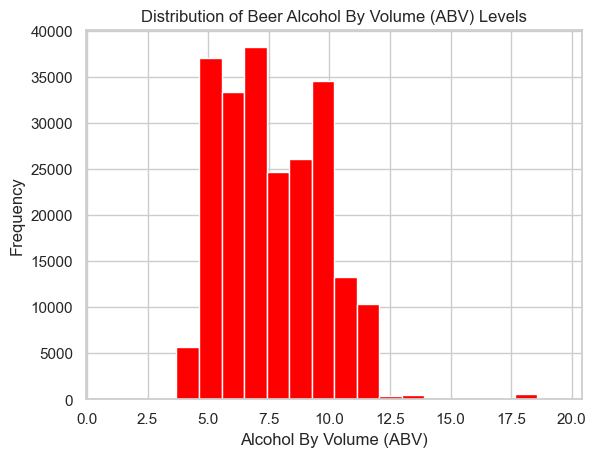

In [3]:
plt.hist(beers['beer_ABV'], bins=20, color='red')

plt.xlabel("Alcohol By Volume (ABV)")
plt.ylabel("Frequency")
plt.title("Distribution of Beer Alcohol By Volume (ABV) Levels")

plt.show()

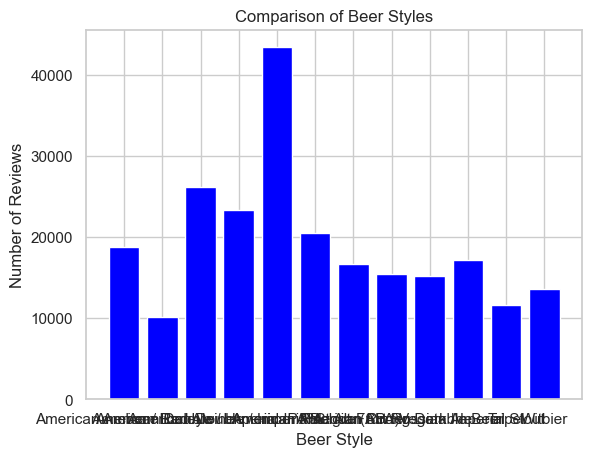

In [4]:
grouped = beers.groupby('beer_style').count()

plt.bar(grouped.index, grouped['review_appearance'], color='blue')

plt.xlabel("Beer Style")
plt.ylabel("Number of Reviews")
plt.title("Comparison of Beer Styles")

plt.show()

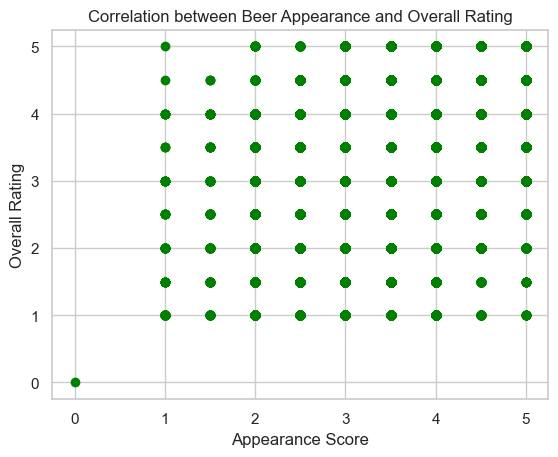

In [5]:
plt.scatter(beers['review_appearance'], beers['review_overall'], color='green')

plt.xlabel("Appearance Score")
plt.ylabel("Overall Rating")
plt.title("Correlation between Beer Appearance and Overall Rating")

plt.show()

C:\Users\dinoz\AppData\Local\Temp\ipykernel_12120\911925925.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = beers.groupby(beers['review_time'].dt.year).mean()


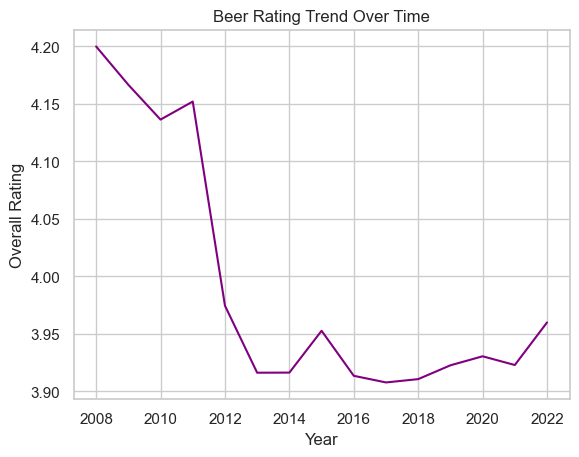

In [6]:
beers['review_time'] = pd.to_datetime(beers['review_time'], unit='s')

grouped = beers.groupby(beers['review_time'].dt.year).mean()

plt.plot(grouped.index + 10, grouped['review_overall'], color='purple')

plt.xlabel("Year")
plt.ylabel("Overall Rating")
plt.title("Beer Rating Trend Over Time")

plt.show()

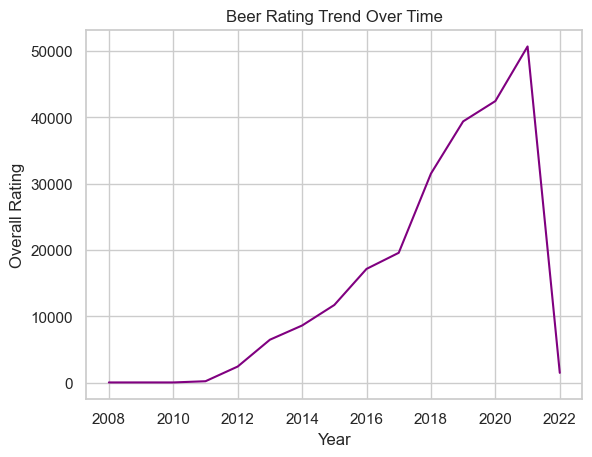

In [7]:
beers['review_time'] = pd.to_datetime(beers['review_time'], unit='s')

grouped = beers.groupby(beers['review_time'].dt.year).count()

plt.plot(grouped.index + 10, grouped['review_overall'], color='purple')

plt.xlabel("Year")
plt.ylabel("Overall Rating")
plt.title("Beer Rating Trend Over Time")

plt.show()

C:\Users\dinoz\AppData\Local\Temp\ipykernel_12120\1990106183.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = beers.groupby('beer_style').mean()


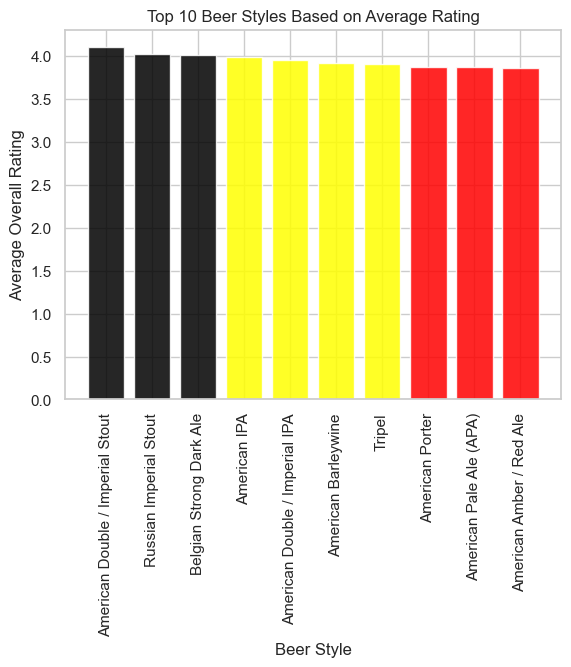

In [8]:
grouped = beers.groupby('beer_style').mean()

grouped = grouped.sort_values(by='review_overall', ascending=False)

grouped = grouped.head(10)

plt.bar(grouped.index, grouped['review_overall'], alpha=0.85, color=['black', 'black', 'black', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red'])

plt.xlabel("Beer Style")
plt.ylabel("Average Overall Rating")
plt.title("Top 10 Beer Styles Based on Average Rating")
plt.xticks(rotation = 90)

plt.show()


C:\Users\dinoz\AppData\Local\Temp\ipykernel_12120\3783694879.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = beers.groupby('beer_color').mean()


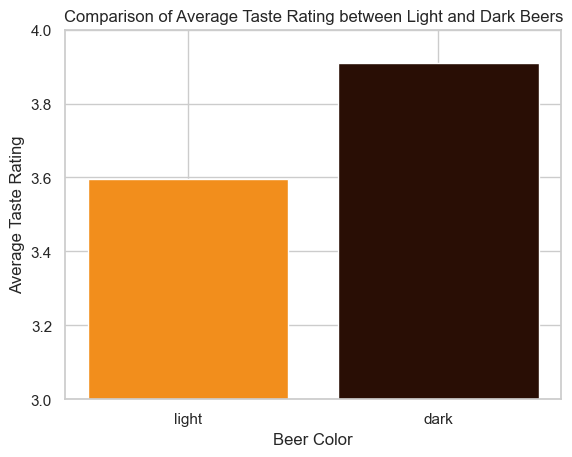

In [9]:
beers['beer_color'] = ['light' if x <= 5 else 'dark' for x in beers['beer_ABV']]

grouped = beers.groupby('beer_color').mean()

light = grouped.loc['light', 'review_taste']
dark = grouped.loc['dark', 'review_taste']

plt.bar(['light', 'dark'], [light, dark], color=['#f28e1c', '#290E05'], hatch='')

plt.xlabel("Beer Color")
plt.ylabel("Average Taste Rating")
plt.title("Comparison of Average Taste Rating between Light and Dark Beers")

plt.ylim(3,4)

plt.show()

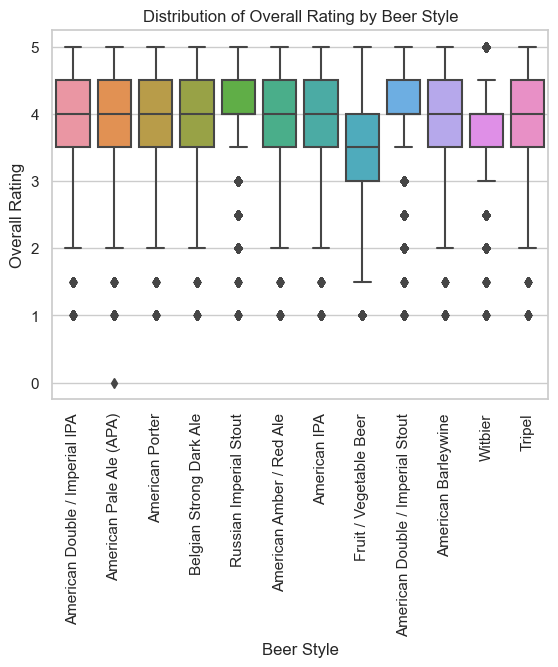

In [10]:
sns.boxplot(x='beer_style', y='review_overall', data=beers)

plt.xlabel("Beer Style")
plt.ylabel("Overall Rating")
plt.title("Distribution of Overall Rating by Beer Style")

plt.xticks(rotation=90)

plt.show()

C:\Users\dinoz\AppData\Local\Temp\ipykernel_12120\876052209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = beers.groupby("beer_style").mean()


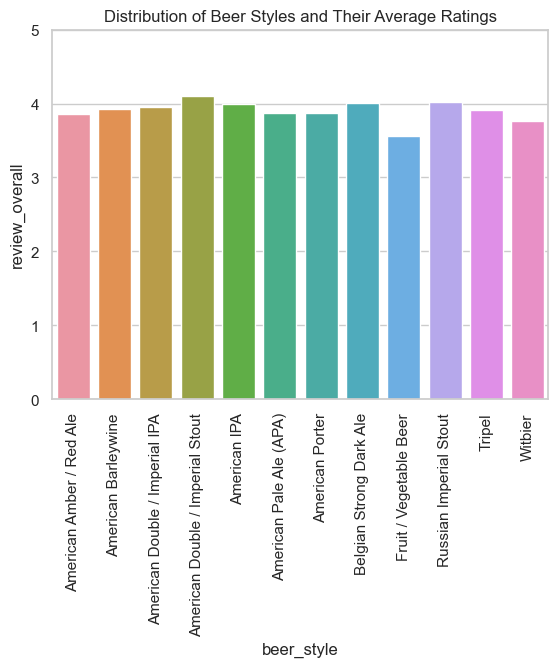

In [11]:
grouped = beers.groupby("beer_style").mean()

sns.barplot(x=grouped.index, y="review_overall", data=grouped)

plt.title("Distribution of Beer Styles and Their Average Ratings")
plt.xticks(rotation=90)
plt.ylim(0,5)

plt.show()

C:\Users\dinoz\AppData\Local\Temp\ipykernel_12120\3055894277.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = beers.groupby("beer_style").mean()


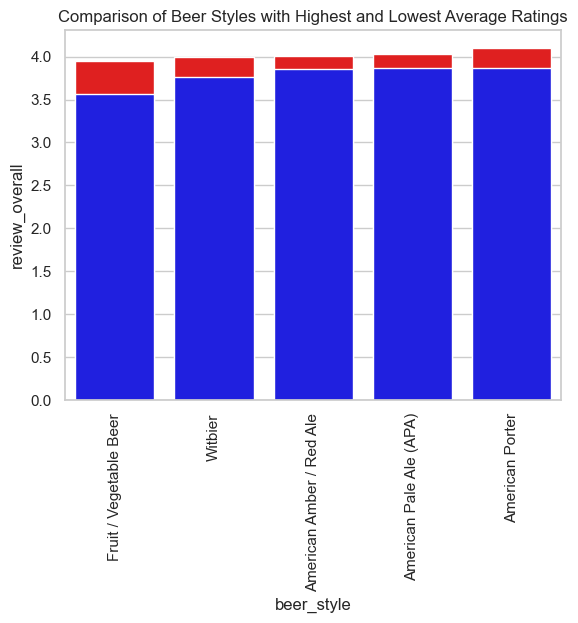

In [18]:
grouped = beers.groupby("beer_style").mean()

grouped = grouped.sort_values(by="review_overall")

highest_rated = grouped.iloc[-5:]
lowest_rated = grouped.iloc[:5]
sns.barplot(x=highest_rated.index, y="review_overall", data=highest_rated, color="red")

sns.barplot(x=lowest_rated.index, y="review_overall", data=lowest_rated, color="blue")

plt.title("Comparison of Beer Styles with Highest and Lowest Average Ratings")
plt.xticks(rotation = 90)

plt.show()
